In [3]:
import pandas as pd

df = pd.read_csv('/content/Instagram-Reach.csv')


null_values = df.isnull().sum()
print("Null Values:")
print(null_values)


print("Information:")
print(df.info())


print("Statistics:")
print(df.describe())


Null Values:
Date               0
Instagram reach    0
dtype: int64
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None
Statistics:
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None


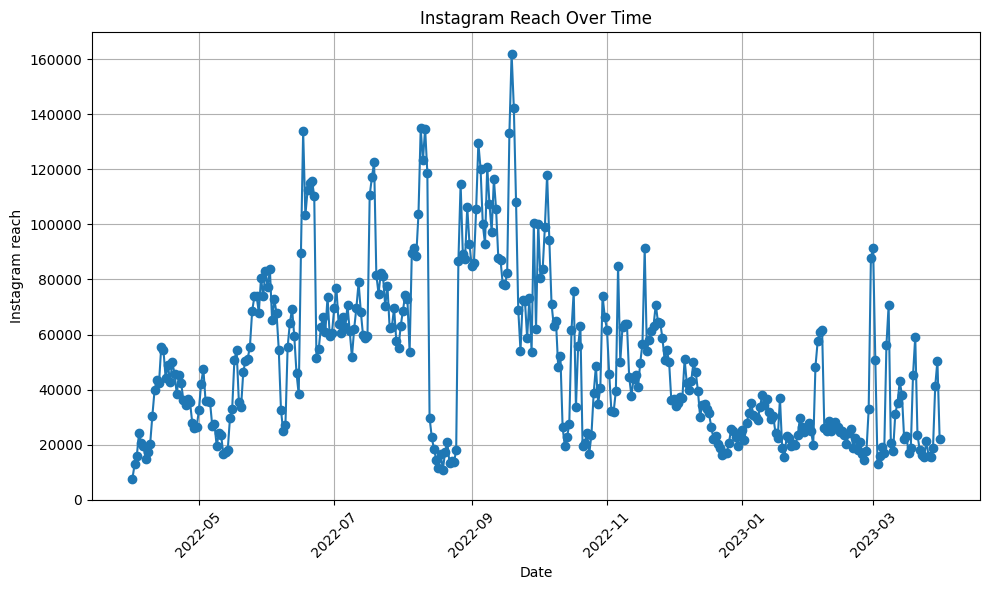

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Instagram reach'], marker='o', linestyle='-')
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


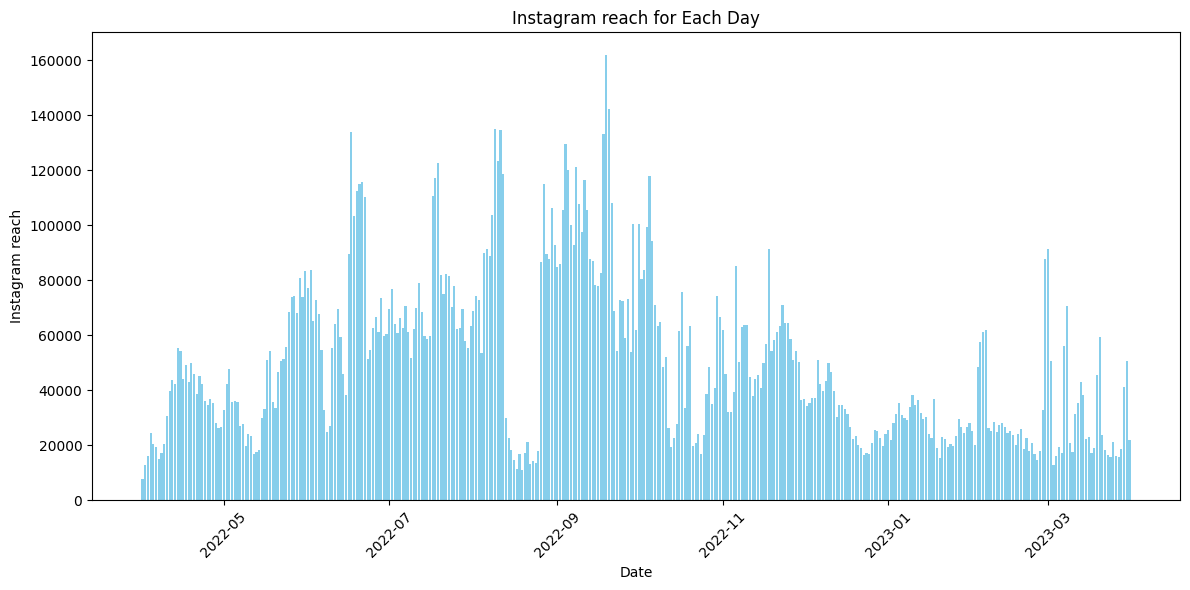

In [7]:

daily_reach = df.groupby(df['Date'].dt.date)['Instagram reach'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(daily_reach['Date'], daily_reach['Instagram reach'], color='skyblue')
plt.title('Instagram reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


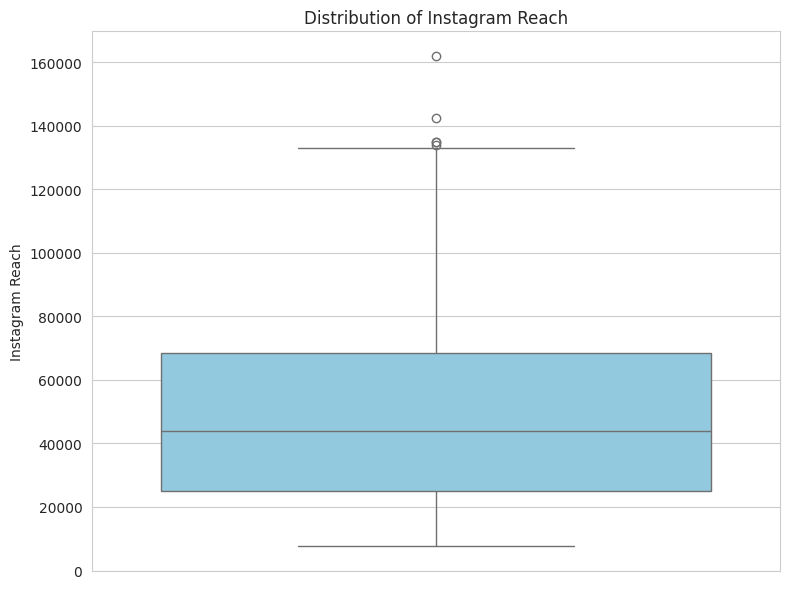

In [8]:
import seaborn as sns


sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Instagram reach'], color='skyblue')
plt.title('Distribution of Instagram Reach')
plt.ylabel('Instagram Reach')
plt.tight_layout()
plt.show()


<ipython-input-9-c6d9140a7c3d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day', y='Instagram reach', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')


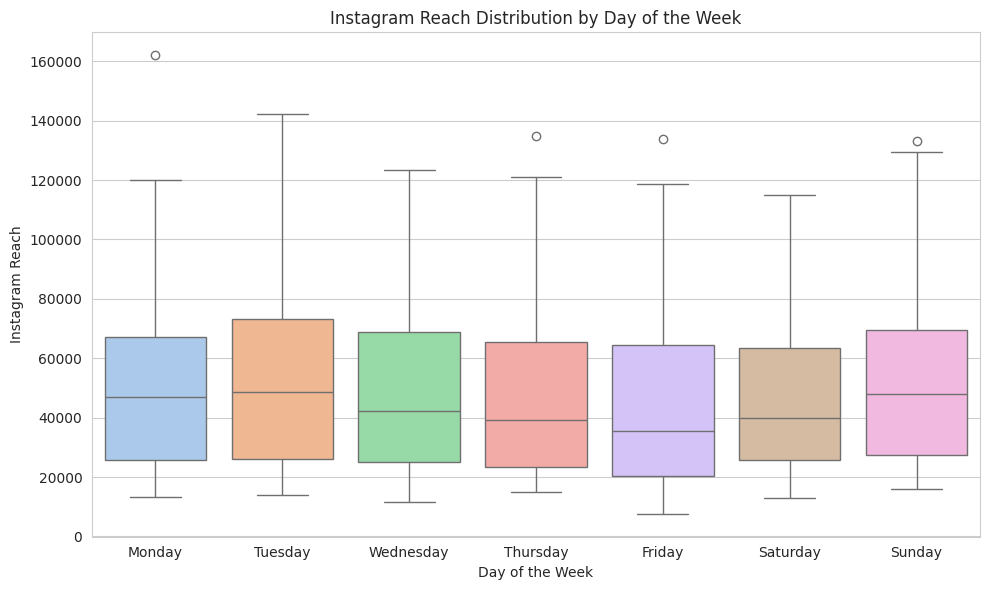

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Day'] = df['Date'].dt.day_name()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='Instagram reach', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')
plt.title('Instagram Reach Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Instagram Reach')
plt.tight_layout()
plt.show()


In [10]:
reach_by_day = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()

print(reach_by_day)


         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


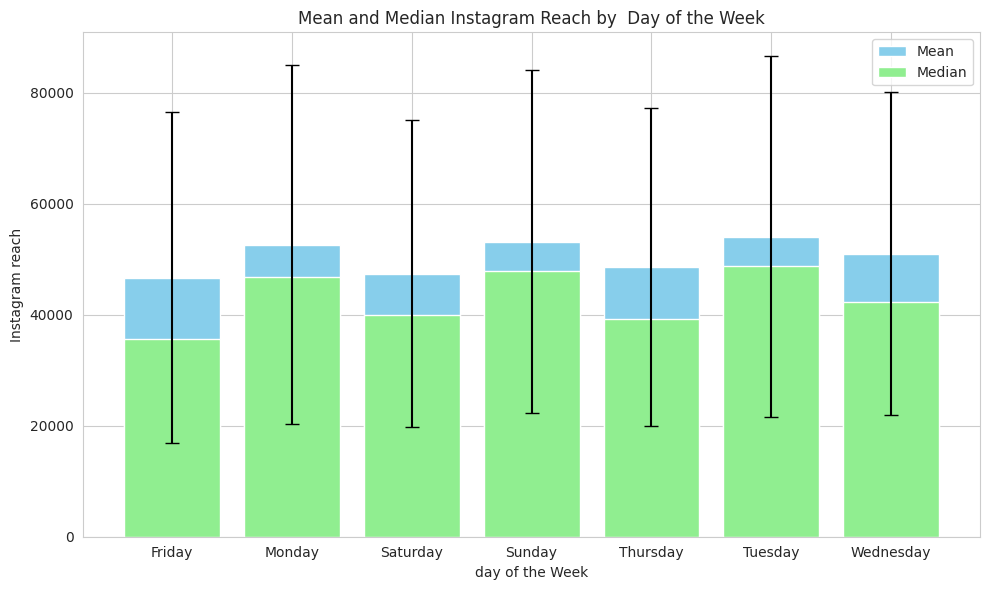

In [12]:
plt.figure(figsize=(10, 6))

plt.bar(reach_by_day['Day'], reach_by_day['mean'], yerr=reach_by_day['std'], capsize=5, color='skyblue', label='Mean')

plt.bar(reach_by_day['Day'], reach_by_day['median'], color='lightgreen', label='Median')

plt.title('Mean and Median Instagram Reach by  Day of the Week')
plt.xlabel('day of the Week')
plt.ylabel('Instagram reach')
plt.legend()
plt.ylim(0)
plt.tight_layout()
plt.show()


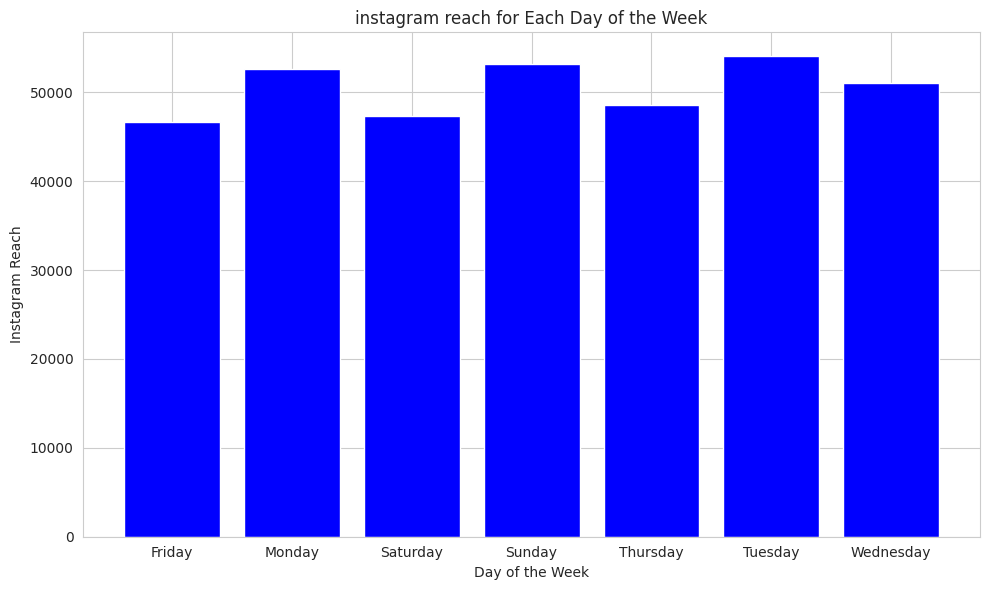

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(reach_by_day['Day'], reach_by_day['mean'], color='blue')
plt.title('instagram reach for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Instagram Reach')
plt.tight_layout()
plt.show()


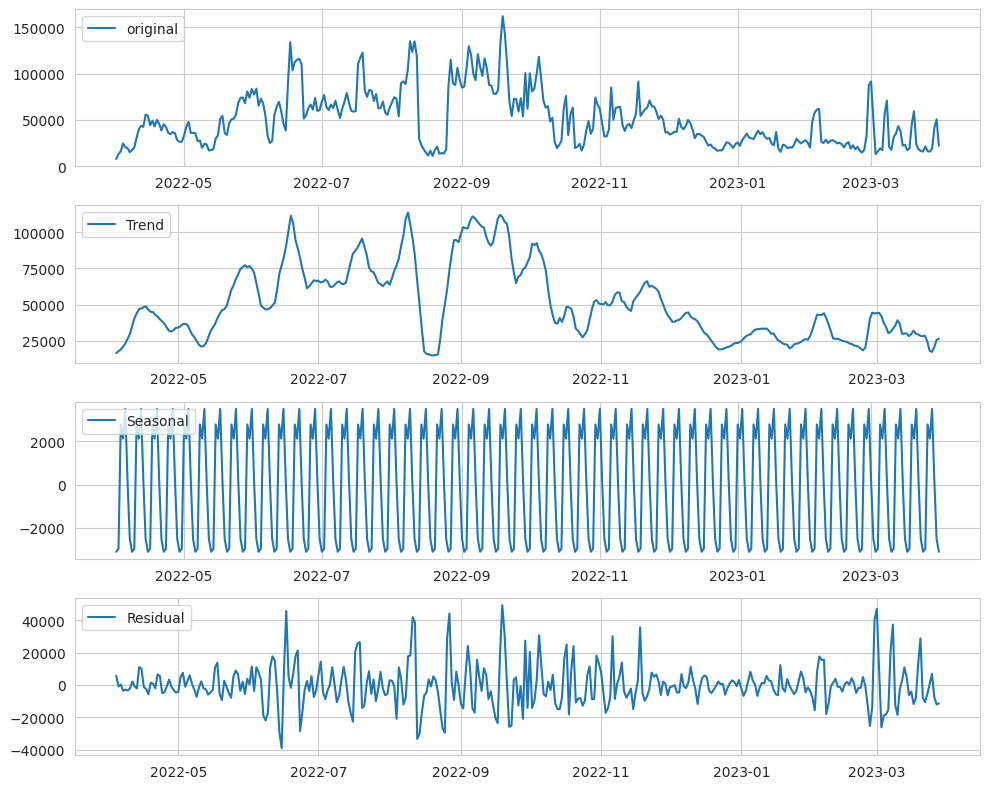

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



decomposition = seasonal_decompose(df['Instagram reach'], model='additive', period=7)

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Instagram reach'], label='original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

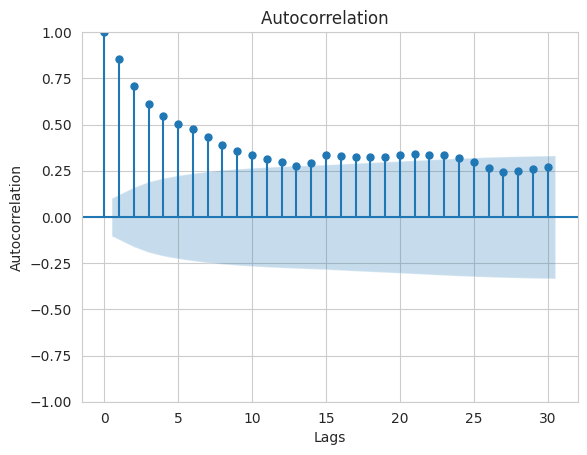

<Figure size 1200x600 with 0 Axes>

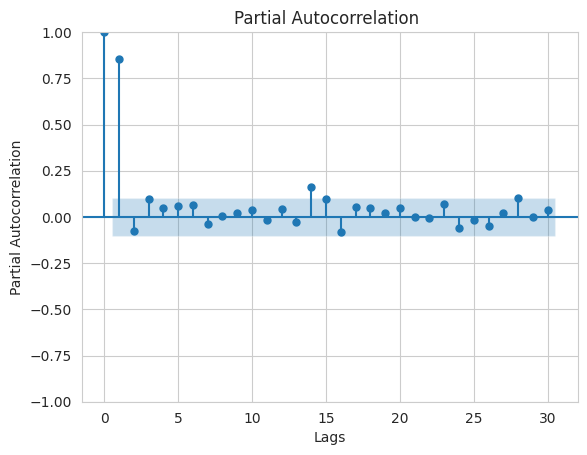

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Instagram reach'], lags=30, title='Autocorrelation  ')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Instagram reach'], lags=30, title='Partial Autocorrelation ')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


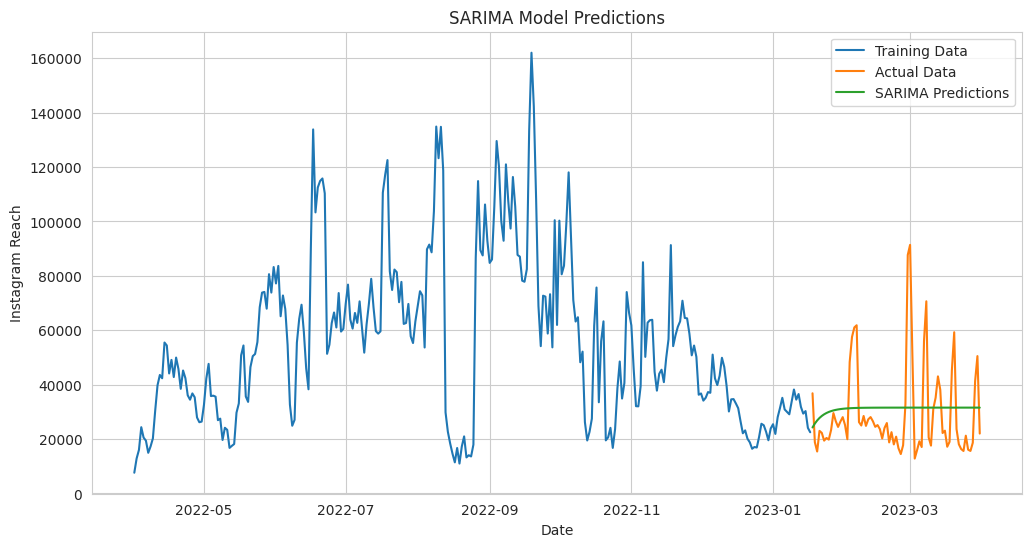

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

p = 1
d = 1
q = 1
seasonal_order = (0, 0, 0, 7)

model = SARIMAX(train_data['Instagram reach'], order=(p, d, q), seasonal_order=seasonal_order)
sarima_model = model.fit()

predictions = sarima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)


plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Instagram reach'], label='Training Data')
plt.plot(test_data.index, test_data['Instagram reach'], label='Actual Data')
plt.plot(test_data.index, predictions, label='SARIMA Predictions')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.show()
